# FOML Assignment - 2
## Group 73
## Vishal Vijay Devadiga (CS21BTECH11061)
## Abhay Kumar (BM21BTECH11001)

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io as sio

# Link to dataset: http://ufldl.stanford.edu/housenumbers/
# Define the path to the dataset
testpath = "./Data/test_32x32.mat"
trainpath = "./Data/train_32x32.mat"

Below are some of the helper functions used in the notebook.

In [2]:
# Load the dataset
def load_data(path):
    data = sio.loadmat(path)
    return data['X'], data['y']

# Reshape the data to n x 32 x 32 x 3
def reshape_data(X):
    X = np.transpose(X, (3, 0, 1, 2))
    return X

# Convert into 1D array and replace label 10 with 0
def get_labels(y):
    y = y.reshape(-1)
    y[y == 10] = 0
    return y

# Print the dataset
def print_set(X,y, set):
    print(set,"set shape: ", X.shape, y.shape)
    print(X)
    print(y)

# Normalize the data
def normalize(X):
    return (X - np.min(X)) / (np.max(X) - np.min(X))

First, we will import the dataset, and modify it to suit our needs.

In [3]:
# Load the dataset
X_train, y_train = load_data(trainpath)
X_test, y_test = load_data(testpath)

# Print the dataset
print_set(X_train, y_train, "Training")
print_set(X_test, y_test, "Test")

Training set shape:  (32, 32, 3, 73257) (73257, 1)
[[[[ 33  84  19 ...  92 190 216]
   [ 30  76  54 ...  78 188 217]
   [ 38  59 110 ... 101 191 212]]

  [[ 15  86  20 ...  94 205 221]
   [ 23  73  52 ...  82 203 222]
   [ 19  66 111 ... 105 206 217]]

  [[ 15  77  25 ... 114 220 226]
   [ 17  78  57 ... 101 218 227]
   [ 19  56 116 ... 125 220 221]]

  ...

  [[ 72  90  65 ... 200 229 200]
   [ 65  78 144 ... 201 231 199]
   [ 56  69 223 ... 203 224 191]]

  [[ 82  88  78 ... 192 229 193]
   [ 77  77 148 ... 193 229 188]
   [ 57  67 218 ... 195 224 182]]

  [[ 89  88  98 ... 190 229 197]
   [ 79  78 158 ... 191 228 189]
   [ 59  66 220 ... 193 223 186]]]


 [[[ 28  85  21 ...  92 183 204]
   [ 39  77  53 ...  78 182 205]
   [ 35  61 110 ... 103 186 202]]

  [[ 14  83  19 ...  93 200 210]
   [ 25  73  52 ...  80 199 211]
   [ 22  64 106 ... 106 201 208]]

  [[ 14  74  25 ... 111 218 220]
   [ 20  69  56 ...  98 217 221]
   [ 17  59 111 ... 124 218 217]]

  ...

  [[ 40  89  63 ... 181 

In [4]:
# Reshape the dataset (X values)
X_train = reshape_data(X_train)
X_test = reshape_data(X_test)

# Reshape the dataset (Y values)
y_train = get_labels(y_train)
y_test = get_labels(y_test)

# Print the dataset
print_set(X_train, y_train, "Training")
print_set(X_test, y_test, "Test")

Training set shape:  (73257, 32, 32, 3) (73257,)
[[[[ 33  30  38]
   [ 15  23  19]
   [ 15  17  19]
   ...
   [ 72  65  56]
   [ 82  77  57]
   [ 89  79  59]]

  [[ 28  39  35]
   [ 14  25  22]
   [ 14  20  17]
   ...
   [ 40  39  50]
   [ 67  58  52]
   [ 83  78  60]]

  [[ 40  41  38]
   [ 18  21  26]
   [ 16  17  23]
   ...
   [ 23  29  45]
   [ 35  42  44]
   [ 72  69  53]]

  ...

  [[ 86  81  75]
   [ 87  82  71]
   [ 82  79  65]
   ...
   [104 104  87]
   [104 105  81]
   [103 105  78]]

  [[ 84  86  64]
   [ 86  79  72]
   [ 82  76  72]
   ...
   [110 103  84]
   [106 105  85]
   [106 104  86]]

  [[ 85  88  68]
   [ 89  82  72]
   [ 85  79  67]
   ...
   [111 104  87]
   [109 105  86]
   [103 106  79]]]


 [[[ 84  76  59]
   [ 86  73  66]
   [ 77  78  56]
   ...
   [ 90  78  69]
   [ 88  77  67]
   [ 88  78  66]]

  [[ 85  77  61]
   [ 83  73  64]
   [ 74  69  59]
   ...
   [ 89  82  64]
   [ 88  79  70]
   [ 88  81  67]]

  [[ 83  76  60]
   [ 78  77  58]
   [ 61  50  54]
   

## Below are some visualizations of the dataset

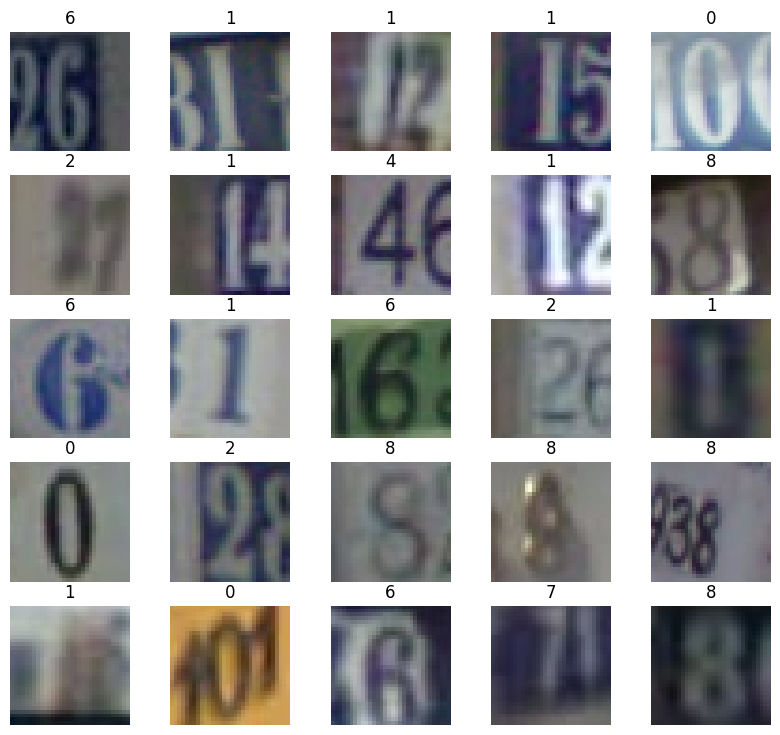

In [5]:
# Plot any x * y images 
x = 5
y = 5
fig, axes = plt.subplots(x,y, figsize=(10,9))

for i in range(x):
    for j in range(y):
        ind = np.random.randint(0, X_train.shape[0])
        axes[i,j].imshow(X_train[ind])
        axes[i,j].axis('off')
        axes[i,j].set_title(y_train[ind])

plt.show()

Label:  0 Count:  4948
Label:  1 Count:  13861
Label:  2 Count:  10585
Label:  3 Count:  8497
Label:  4 Count:  7458
Label:  5 Count:  6882
Label:  6 Count:  5727
Label:  7 Count:  5595
Label:  8 Count:  5045
Label:  9 Count:  4659


(array([ 4948., 13861., 10585.,  8497.,  7458.,  6882.,  5727.,  5595.,
         5045.,  4659.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

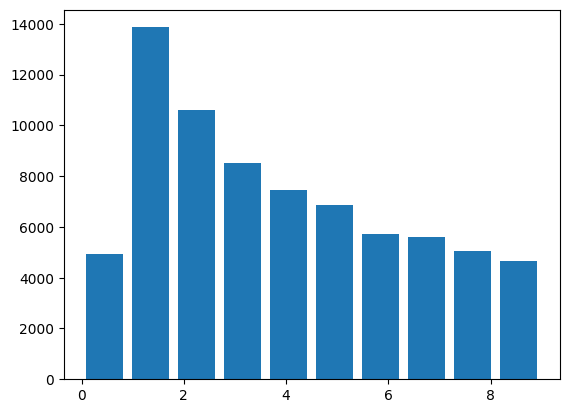

In [6]:
# Plot the count of each label
for i in range(10):
    print("Label: ", i, "Count: ", len(y_train[y_train == i]))
    
plt.hist(y_train, bins=10, rwidth=0.8)

Now, we will undersample the data to make it balanced, and make it easier to train our model.

In [7]:
# Randomly sample 2500 images from each label
X_sample, y_sample = [], []
for i in range(10):
    ind = np.random.choice(np.where(y_train == i)[0], 2500, replace=False)
    X_sample.append(X_train[ind])
    y_sample.append(y_train[ind])

# Concatenate the sampled images
X_train = np.concatenate(X_sample, axis=0)
y_train = np.concatenate(y_sample, axis=0)

Label:  0 Count:  2500
Label:  1 Count:  2500
Label:  2 Count:  2500
Label:  3 Count:  2500
Label:  4 Count:  2500
Label:  5 Count:  2500
Label:  6 Count:  2500
Label:  7 Count:  2500
Label:  8 Count:  2500
Label:  9 Count:  2500


(array([2500., 2500., 2500., 2500., 2500., 2500., 2500., 2500., 2500.,
        2500.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

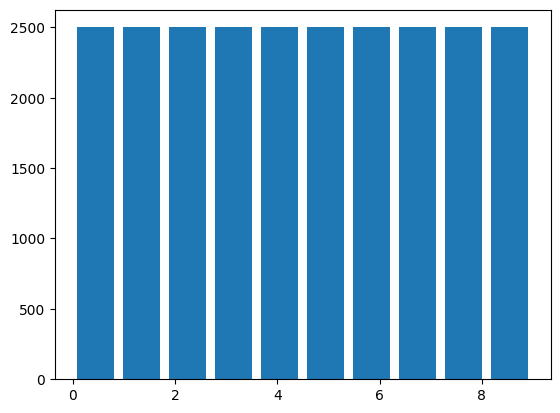

In [8]:
# Show that the count of each label is now 2500
for i in range(10):
    print("Label: ", i, "Count: ", len(y_train[y_train == i]))
    
plt.hist(y_train, bins=10, rwidth=0.8)

# Question 1: Principal component analysis

In [9]:
# Import the required libraries
from sklearn.decomposition import PCA

# Reshape the data
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

## Part (a) 
Perform PCA on SVHN data set. Find how many top eigenvectors are required to keep the proportion of variance above 0.9. Plot PoV against number of eigenvectors.

In [10]:
# Perform PCA
pca = PCA()
pca.fit(X_train_flat)

PCA()

Below are the plotted graphs for PoV vs number of eigenvectors.

/tmp/ipykernel_108771/1338656417.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


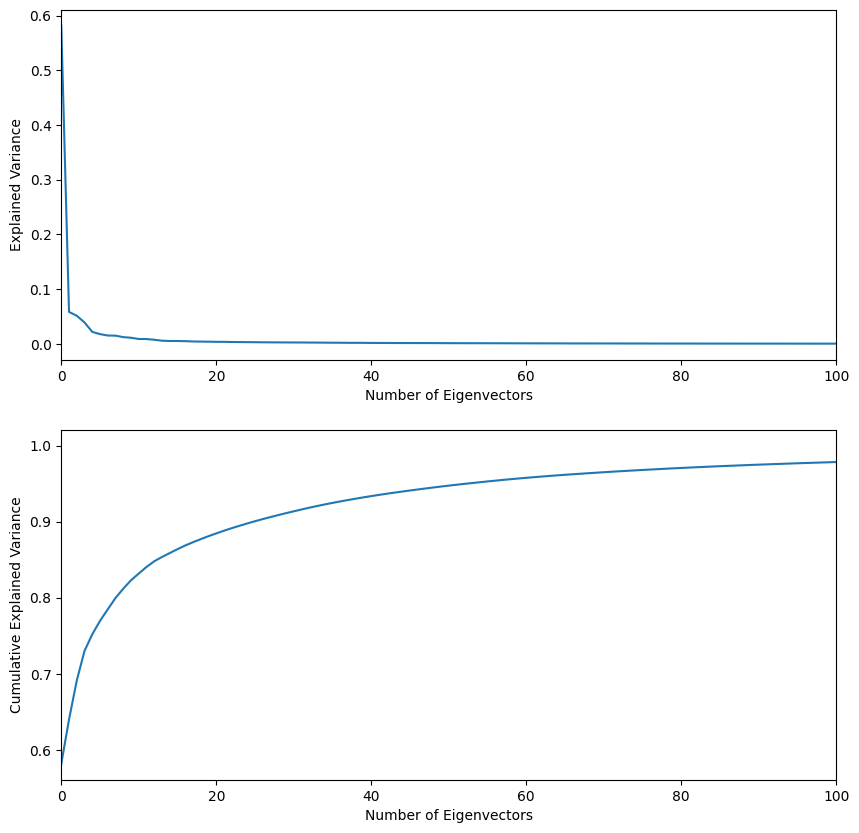

In [11]:
# Plot the explained variance
fig, axis = plt.subplots(2, 1, figsize=(10, 10))
axis[0].plot(pca.explained_variance_ratio_)
axis[0].set_xlabel('Number of Eigenvectors')
axis[0].set_ylabel('Explained Variance')
axis[0].set_xlim([0, 100])

# Plot the cumulative explained variance
axis[1].plot(np.cumsum(pca.explained_variance_ratio_))
axis[1].set_xlabel('Number of Eigenvectors')
axis[1].set_ylabel('Cumulative Explained Variance')
axis[1].set_xlim([0, 100])

fig.show()

To Find out the number of components required to explain 0.9 PoV, we will use the `explained_variance_ratio_` attribute of the PCA object.

In [12]:
# Print the number of components explaining 90% variance
comp = 1
for i in range(100):
    if np.cumsum(pca.explained_variance_ratio_)[i] >= 0.9:
        comp = i
        break
print("Number of components explaining 90% variance: ", comp)


Number of components explaining 90% variance:  25


In [13]:
# Transform the data using PCA
X_train_pca = pca.transform(X_train_flat)

## Part (b) 
Visualize top 10 eigenvectors and provide reconstruction of 10 SVHN samples (one from each class) using top 10 eigenvectors.

Now we will use the top 10 eigenvectors.

In [14]:
# Use 10 components for PCA
pca_10 = PCA(n_components=10)
pca_10.fit(X_train_flat)

# Transform the data using PCA, then reconstruct it
X_train_pca_10 = pca_10.transform(X_train_flat)
X_train_pca_hat_10 = pca_10.inverse_transform(X_train_pca_10)

In [15]:
# Select 10 random images for each label
ind = []
for i in range(10):
    ind.append(np.random.choice(np.where(y_train == i)[0], 1, replace=False)[0])
    # ind.append(np.where(y_train == i)[0][0])

# Some constants used below
size_x = 10
size_y = 5
y = y_train

Below are the original images, and the reconstructed images.

/tmp/ipykernel_108771/1580655015.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


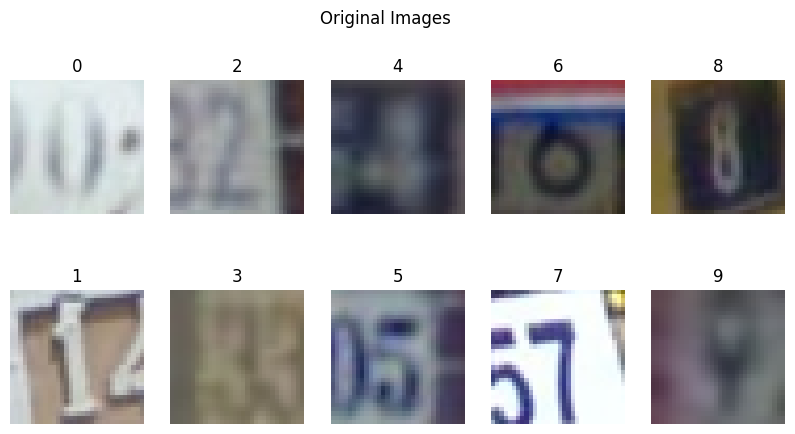

In [16]:
# Plot the original images
X = X_train_flat
fig, axes = plt.subplots(2, int(len(ind)/2), figsize=(size_x, size_y))
for i in range(len(ind)):
    axes[i%2, int(i/2)].imshow(X[ind[i]].reshape(32, 32, 3))
    axes[i%2, int(i/2)].axis('off')
    axes[i%2, int(i/2)].set_title(y[ind[i]])
fig.suptitle("Original Images")
fig.show()

/tmp/ipykernel_108771/3038397500.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


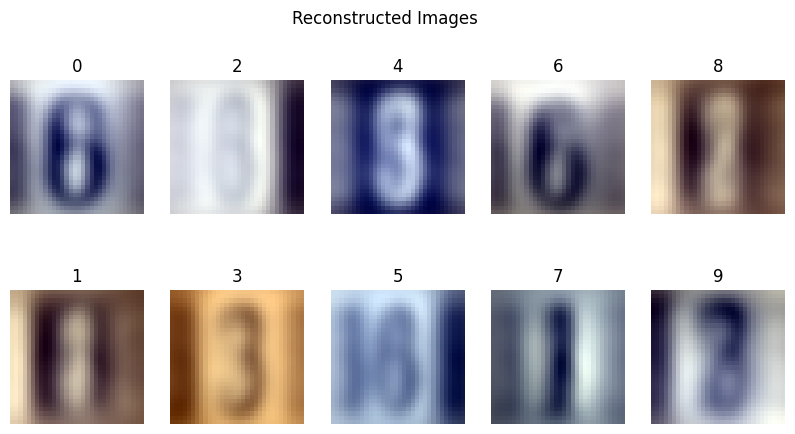

In [17]:
# Plot the reconstructed images
X = X_train_pca_hat_10
fig, axes = plt.subplots(2, int(len(ind)/2), figsize=(size_x, size_y))
for i in range(len(ind)):
    axes[i%2, int(i/2)].imshow(normalize(X[ind[i]].reshape(32, 32, 3)))
    axes[i%2, int(i/2)].axis('off')
    axes[i%2, int(i/2)].set_title(y[ind[i]])
fig.suptitle("Reconstructed Images")
fig.show()

## Part (c) 
Run k-NN (for k=5 and k=7) on raw data and data obtained after PCA dimensionality reduction for dimension as found in part (a) and for dimension 10 as in part (b). 
Provide the accuracy of the predictions on the test data set for these various cases and discuss your observations.

In [18]:
# Import the required libraries
from sklearn.neighbors import KNeighborsClassifier

# Define the KNN models
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_7 = KNeighborsClassifier(n_neighbors=7)

knn_5_pca_comp = KNeighborsClassifier(n_neighbors=5)
knn_7_pca_comp = KNeighborsClassifier(n_neighbors=7)

knn_5_pca_10 = KNeighborsClassifier(n_neighbors=5)
knn_7_pca_10 = KNeighborsClassifier(n_neighbors=7)

First, we will run k-NN on the raw data.

In [19]:
# Fit the general models
knn_5.fit(X_train_flat, y_train)
knn_7.fit(X_train_flat, y_train)

KNeighborsClassifier(n_neighbors=7)

Below are the accuracies for k=5 and k=7 on the raw data.

In [20]:
# Print the accuracy of the general models
acc_5 = knn_5.score(X_test_flat, y_test)
acc_7 = knn_7.score(X_test_flat, y_test)

print("Accuracy using 5 neighbors: ", acc_5)
print("Accuracy using 7 neighbors: ", acc_7)

Accuracy using 5 neighbors:  0.3965888137676706
Accuracy using 7 neighbors:  0.408919791026429


Now we will use the PCA transformed data to train the KNN model for the number of components found in part (a)

In [21]:
# Define the PCA model for components explaining 90% variance
pca_comp = PCA(n_components=comp)
pca_comp.fit(X_train_flat)

X_train_pca_comp = pca_comp.transform(X_train_flat)
X_test_pca_comp = pca_comp.transform(X_test_flat)

In [22]:
# Fit the PCA models
knn_5_pca_comp.fit(X_train_pca_comp, y_train)
knn_7_pca_comp.fit(X_train_pca_comp, y_train)

KNeighborsClassifier(n_neighbors=7)

In [23]:
# Print the accuracy of the PCA models
acc_5_pca_comp = knn_5_pca_comp.score(X_test_pca_comp, y_test)
acc_7_pca_comp = knn_7_pca_comp.score(X_test_pca_comp, y_test)

print("Accuracy using 5 neighbors and PCA with", comp, "components: ", acc_5_pca_comp)
print("Accuracy using 7 neighbors and PCA with", comp, "components: ", acc_7_pca_comp)

Accuracy using 5 neighbors and PCA with 25 components:  0.3930162876459742
Accuracy using 7 neighbors and PCA with 25 components:  0.41030270436385985


Now we will use the PCA transformed data to train the KNN model for the 10 components

In [24]:
# Transform the data using PCA with 10 components
X_test_pca_10 = pca_10.transform(X_test_flat)

In [25]:
# Fit the PCA models with 10 components
knn_5_pca_10.fit(X_train_pca_10, y_train)
knn_7_pca_10.fit(X_train_pca_10, y_train)

KNeighborsClassifier(n_neighbors=7)

In [26]:
# Print the accuracy of the PCA models with 10 components
acc_5_pca_10 = knn_5_pca_10.score(X_test_pca_10, y_test)
acc_7_pca_10 = knn_7_pca_10.score(X_test_pca_10, y_test)

print("Accuracy using 5 neighbors and PCA with 10 components: ", acc_5_pca_10)
print("Accuracy using 7 neighbors and PCA with 10 components: ", acc_7_pca_10)

Accuracy using 5 neighbors and PCA with 10 components:  0.24235556238475722
Accuracy using 7 neighbors and PCA with 10 components:  0.25587738168408114


## Explanation of the results

When we use the result of part (a), we get a similar accuracy to the raw data, because the eigenvectors are able to capture most of the variance in the data.

When we use 10 components, we get a much lower accuracy, because the eigenvectors are not able to capture most of the variance in the data.

Also when we compare the results of k=5 and k=7, we see that k=7 gives a bit better accuracy than k=5.

# Question 2: K-means clustering

In [27]:
# Import the required libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import rand_score
# Why doesn't sklearn have Purity metric?

scaler = StandardScaler()

Below are some helper functions for the question

In [28]:
# Define helper functions

# Run kmeans and return the results, SSE, cluster assignments and centroids
def run_kmeans(X, n, scale=True):
    km = KMeans(n_clusters=n, n_init=10, max_iter=200)
    if scale:
        X = scaler.fit_transform(X)
    km.fit(X)
    sse = km.inertia_
    cl_assig = km.labels_
    centroids = scaler.inverse_transform(km.cluster_centers_) if scale else km.cluster_centers_
    return km, sse, cl_assig, centroids

# Find the closest points to the centroids
def find_closest_points(km, X, centers, n):
    points = np.zeros(n)
    for i in range(n):
        points[i] = np.argmin(np.linalg.norm(X - centers[i], axis=1))
    return points

# Print the closest points to the centroids
def print_point_closest_centroid(closest_points, title):
    closest_points = np.array(closest_points, dtype=int)
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for i in range(10):
        axes[i%2, int(i/2)].imshow(X_train[closest_points[i]])
        axes[i%2, int(i/2)].axis('off')
        axes[i%2, int(i/2)].set_title(y_train[closest_points[i]])
    fig.suptitle(title)
    fig.show()

# Print the number of points in each cluster
def bin_count(labels, n):
    for i in range(n):
        print("Label: ", i, "Count: ", np.bincount(y_train[labels == i]))

# Find purity of the clusters
def purity(labels, y, n):
    pur = 0
    for i in range(n):
        counts = np.bincount(y[labels == i])
        pur += np.max(counts)
    return pur / len(labels)

# Label clusters based on most frequent label
def label_cluster(labels, y, n):
    res = np.zeros_like(labels)
    for i in range(n):
        counts = np.bincount(y[labels == i])
        res[labels == i] = np.argmax(counts)
    return res

# Find the accuracy of the clusters
def acc_cl_labels(labels, cl_labels, y, n):
    acc = 0
    for i in range(n):
        acc += np.sum(y[labels == i] == cl_labels[labels == i])
    return acc / len(labels)

## Part (a)
Perform k means clustering with k=10 on the raw data and on data obtained after PCA dimensionality reduction for dimension as found in question 1 (a) and for dimension 10 as in question 1 (b).
You may use only training data of SVHN to perform this. 
Do you observe images from the same class to be clustered together ? For each cluster, provide the image closest to the centroid.

In [29]:
# Run kmeans on the original data, PCA with 90% variance and PCA with 10 components respectively
km, sse, cl_assig, centroids = run_kmeans(X_train_flat, 10)
km_comp, sse_comp, cl_assig_pca_comp, centroids_comp = run_kmeans(X_train_pca_comp, 10)
km_10, sse_10, cl_assig_pca_10, centroids_10 = run_kmeans(X_train_pca_10, 10)

In [30]:
# Find the closest points to the centroids
closest_points = find_closest_points(km, X_train_flat, centroids, 10)
closest_points_comp = find_closest_points(km_comp, X_train_pca_comp, centroids_comp, 10)
closest_points_10 = find_closest_points(km_10, X_train_pca_10, centroids_10, 10)

Now we will print, for each cluster, the count of labels and the image closest to the centroid.

Labels in each cluster
Label:  0 Count:  [307 253 219 282 305 257 237 232 301 267]
Label:  1 Count:  [318 263 313 282 295 305 266 289 304 293]
Label:  2 Count:  [ 27 212 147 138 103  87  86  95  67  79]
Label:  3 Count:  [239 225 271 191 209 218 246 226 219 201]
Label:  4 Count:  [288 322 338 337 307 337 312 335 296 381]
Label:  5 Count:  [158 122 108  90 118 107 137 138 151 116]
Label:  6 Count:  [402 330 356 349 400 388 419 390 399 390]
Label:  7 Count:  [385 376 352 371 369 381 390 396 388 391]
Label:  8 Count:  [127 104 119 137 117 122 131 106 120 107]
Label:  9 Count:  [249 293 277 323 277 298 276 293 255 275]


/tmp/ipykernel_108771/339224115.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


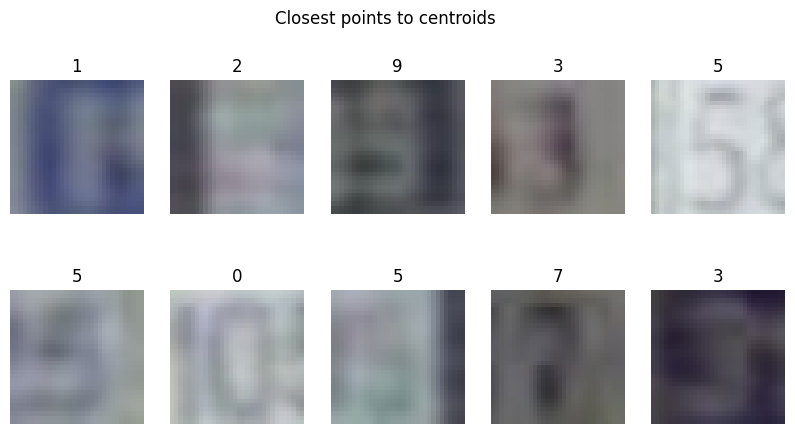

In [31]:
print("Labels in each cluster")
bin_count(cl_assig, 10)
print_point_closest_centroid(closest_points, "Closest points to centroids")

Labels in each cluster for PCA with 25 components
Label:  0 Count:  [ 32  42 312 504  49 291  20 526  69  65]
Label:  1 Count:  [389 136 166 202 176 276 251 276 244 268]
Label:  2 Count:  [ 37 343 267 249 155 154 141 142 100 131]
Label:  3 Count:  [566 478 625 539 427 585 605 503 610 591]
Label:  4 Count:  [226 442 422 337 488 272 272 268 276 251]
Label:  5 Count:  [168 155 152 163 154 173 160 148 148 160]
Label:  6 Count:  [440  30  55  24  21 146 418   6 350 452]
Label:  7 Count:  [271 202 282 279 183 381 328 312 388 289]
Label:  8 Count:  [ 74 558  67  56 681  52  91  88  75  81]
Label:  9 Count:  [297 114 152 147 166 170 214 231 240 212]


/tmp/ipykernel_108771/339224115.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


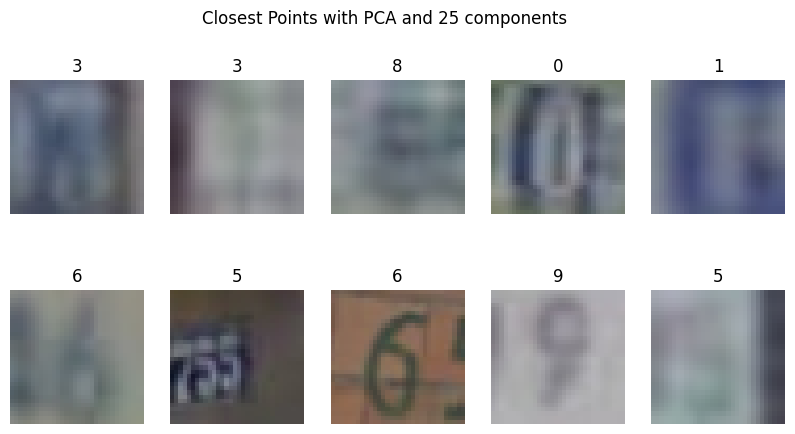

In [32]:
print("Labels in each cluster for PCA with", comp, "components")
bin_count(cl_assig_pca_comp, 10)
print_point_closest_centroid(closest_points_comp, "Closest Points with PCA and " + str(comp) + " components")

Labels in each cluster for PCA with 10 components
Label:  0 Count:  [409 381 423 391 418 437 348 344 405 415]
Label:  1 Count:  [316 105 147 134 175 180 231 221 245 204]
Label:  2 Count:  [142 130 128 151 132 126 153 337 133 199]
Label:  3 Count:  [291 257 275 266 243 269 261 273 262 249]
Label:  4 Count:  [260 191 284 241 179 269 235 209 236 208]
Label:  5 Count:  [ 30 323 274 250 165 170 130 134 103 140]
Label:  6 Count:  [147 445 281 196 285 131 127 454 112 102]
Label:  7 Count:  [231 371 423 462 470 346 255 327 326 401]
Label:  8 Count:  [356  60  86 208  80 282 346  11 316 338]
Label:  9 Count:  [318 237 179 201 353 290 414 190 362 244]


/tmp/ipykernel_108771/339224115.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


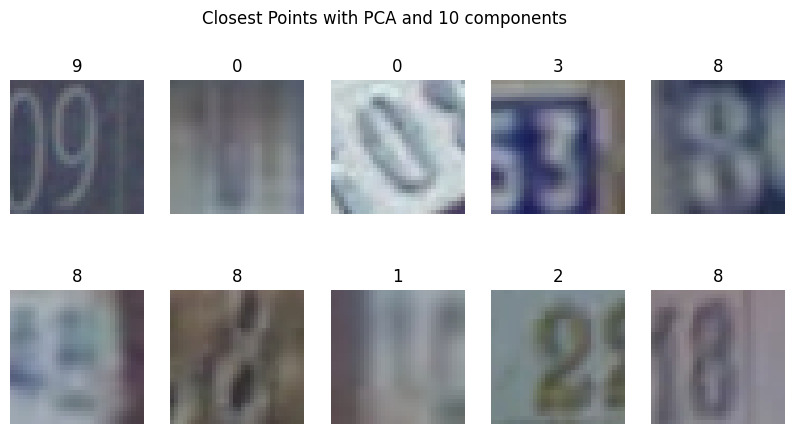

In [33]:
print("Labels in each cluster for PCA with 10 components")
bin_count(cl_assig_pca_10, 10)
print_point_closest_centroid(closest_points_10, "Closest Points with PCA and 10 components")

## Part (b)
Find the sum squared error for each of these different clustering obtained in 2 (a). 
Make use of the label information associated with the images to evaluate your clustering.
Specifically, evaluate the goodness of your clusters for various cases in 2 (a) by using two evaluation metrics purity and rand-index.

In [34]:
# Print the Sum of Squared Errors found in 2(a)
print("SSE for original data: ", sse)
print("SSE for PCA with", comp, "components: ", sse_comp)
print("SSE for PCA with 10 components: ", sse_10)

SSE for original data:  31351353.278752446
SSE for PCA with 25 components:  541359.1946139783
SSE for PCA with 10 components:  172620.2938737278


In [35]:
# Print the purity of the clusters
print("Purity for original data: ", purity(cl_assig, y_train, 10))
print("Purity for PCA with", comp, "components: ", purity(cl_assig_pca_comp, y_train, 10))
print("Purity for PCA with 10 components: ", purity(cl_assig_pca_10, y_train, 10))

Purity for original data:  0.11688
Purity for PCA with 25 components:  0.17448
Purity for PCA with 10 components:  0.14728


In [36]:
# Print the rand index of the clusters
print("Rand Index for original data: ", rand_score(cl_assig, y_train))
print("Rand Index for PCA with", comp, "components: ", rand_score(cl_assig_pca_comp, y_train))
print("Rand Index for PCA with 10 components: ", rand_score(cl_assig_pca_10, y_train))

Rand Index for original data:  0.8076572054882195
Rand Index for PCA with 25 components:  0.8083738997559903
Rand Index for PCA with 10 components:  0.8149944237769511


## Explanation of the results

While the rand index is similar for all the cases, the purity is higher for the PCA transformed data.

Also the sum squared error is much lower for the PCA transformed data. This is because the PCA transformed data has a much lower dimensionality and lower noise, and hence the clusters are more well defined.

## Part (c)

If you label each cluster with the digit that occurs most frequently within it, then what is your classification accuracy with this unsupervised method for various cases ? 
How does this compare with the accuracy you got with the K-NN classifier in Q1 (c) ?

In [37]:
# Find the most frequent label in each cluster
cl = label_cluster(cl_assig, y_train, 10)
cl_comp = label_cluster(cl_assig_pca_comp, y_train, 10)
cl_10 = label_cluster(cl_assig_pca_10, y_train, 10)

Below are the most frequent labels for each cluster, in kmeans on the original data, and the PCA transformed data respectively.

In [38]:
print("Labels for original data: ")
for i in range(10):
    print("Cluster: ", i, "Label: ", cl[i])

Labels for original data: 
Cluster:  0 Label:  0
Cluster:  1 Label:  0
Cluster:  2 Label:  3
Cluster:  3 Label:  7
Cluster:  4 Label:  6
Cluster:  5 Label:  0
Cluster:  6 Label:  7
Cluster:  7 Label:  0
Cluster:  8 Label:  0
Cluster:  9 Label:  6


In [39]:
print("Labels for PCA with", comp, "components: ")
for i in range(10):
    print("Cluster: ", i, "Label: ", cl_comp[i])

Labels for PCA with 25 components: 
Cluster:  0 Label:  0
Cluster:  1 Label:  4
Cluster:  2 Label:  0
Cluster:  3 Label:  0
Cluster:  4 Label:  2
Cluster:  5 Label:  8
Cluster:  6 Label:  5
Cluster:  7 Label:  0
Cluster:  8 Label:  9
Cluster:  9 Label:  0


In [40]:
print("Labels for PCA with 10 components: ")
for i in range(10):
    print("Cluster: ", i, "Label: ", cl_10[i])

Labels for PCA with 10 components: 
Cluster:  0 Label:  0
Cluster:  1 Label:  6
Cluster:  2 Label:  6
Cluster:  3 Label:  4
Cluster:  4 Label:  0
Cluster:  5 Label:  7
Cluster:  6 Label:  0
Cluster:  7 Label:  0
Cluster:  8 Label:  5
Cluster:  9 Label:  0


The accuracy calculated using the most frequent labels is as follows:

In [41]:
# Find the accuracy of the clusters using the most frequent label
acc = acc_cl_labels(cl_assig, cl, y_train, 10)
acc_comp = acc_cl_labels(cl_assig_pca_comp, cl_comp, y_train, 10)
acc_10 = acc_cl_labels(cl_assig_pca_10, cl_10, y_train, 10)

print("Accuracy for original data: ", acc)
print("Accuracy for PCA with", comp, "components: ", acc_comp)
print("Accuracy for PCA with 10 components: ", acc_10)

Accuracy for original data:  0.11688
Accuracy for PCA with 25 components:  0.17448
Accuracy for PCA with 10 components:  0.14728


## Explanation of the results

The accuracy of using a model where we label each cluster with the most frequent label is much lower than the accuracy of the KNN model.

This is because the most frequent label in a cluster is not necessarily the label of the cluster, and hence the accuracy is lower.

## Part (d)

Perform k means clustering with k=5 on data obtained after PCA dimensionality reduction for dimension as found in question 1 (a). 
Find the sum squared error for each of these cases. 
Do you observe images from different classes to be clustered together ? 

Which all classes do you find are getting clustered together.

In [42]:
# Use k = 5 and run kmeans on the dat with PCA with 90% variance and PCA with 10 components respectively
km_k5_comp, sse_k5_comp, cl_assig_k5_comp, centroids_k5_comp = run_kmeans(X_train_pca_comp, 5)
km_k5_10, sse_k5_10, cl_assig_k5_10, centroids_k5_10 = run_kmeans(X_train_pca_10, 5)

In [43]:
# Print the Sum of Squared Errors
print("SSE for PCA with", comp, "components and k=5: ", sse_k5_comp)
print("SSE for PCA with 10 components and k=5: ", sse_k5_10)

SSE for PCA with 25 components and k=5:  574803.261350848
SSE for PCA with 10 components and k=5:  201546.59465405243


In [44]:
# Print the count of labels in each cluster
print("Labels in each cluster for PCA with", comp, "components and k=5")
bin_count(cl_assig_k5_comp, 5)
print("Labels in each cluster for PCA with 10 components and k=5")
bin_count(cl_assig_k5_10, 5)

Labels in each cluster for PCA with 25 components and k=5
Label:  0 Count:  [424 247 243 239 297 261 335 355 338 362]
Label:  1 Count:  [116 433 382 337 243 224 216 241 172 210]
Label:  2 Count:  [624 623 591 581 593 562 608 620 603 575]
Label:  3 Count:  [725 621 698 659 744 761 691 664 758 672]
Label:  4 Count:  [611 576 586 684 623 692 650 620 629 681]
Labels in each cluster for PCA with 10 components and k=5
Label:  0 Count:  [353 505 487 445 329 385 384 424 316 324]
Label:  1 Count:  [409 192 219 213 250 247 319 334 309 314]
Label:  2 Count:  [603 627 700 662 801 687 674 598 761 717]
Label:  3 Count:  [534 496 483 493 437 495 491 507 484 436]
Label:  4 Count:  [601 680 611 687 683 686 632 637 630 709]


Below are the quantity of each label in each cluster.

/tmp/ipykernel_108771/2704058915.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


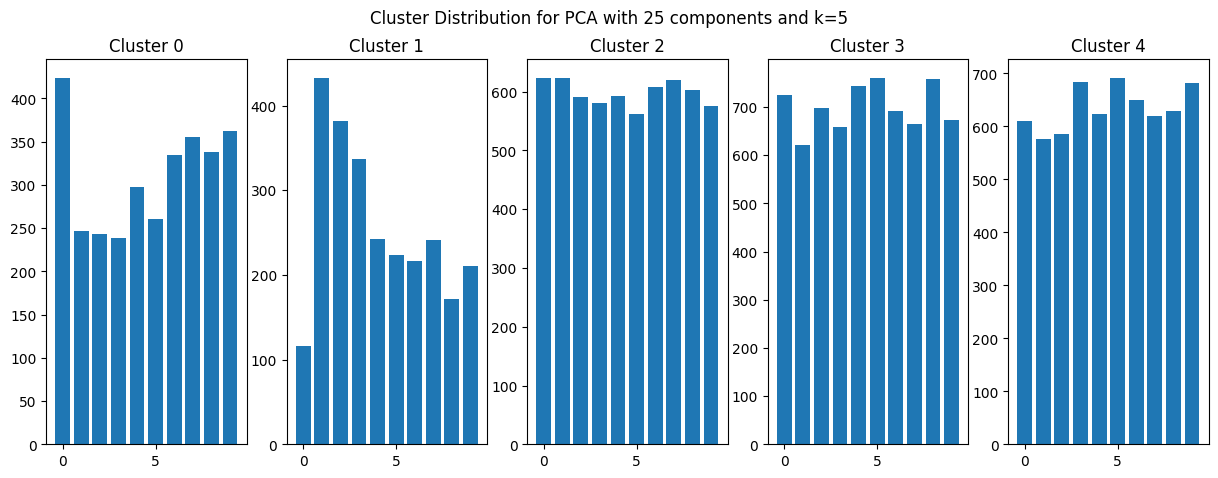

In [45]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for i in range(5):
    axes[i].bar(np.arange(10), np.bincount(y_train[cl_assig_k5_comp == i]))
    axes[i].set_title("Cluster " + str(i))

fig.suptitle("Cluster Distribution for PCA with " + str(comp) + " components and k=5")
fig.show()

/tmp/ipykernel_108771/2715495519.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


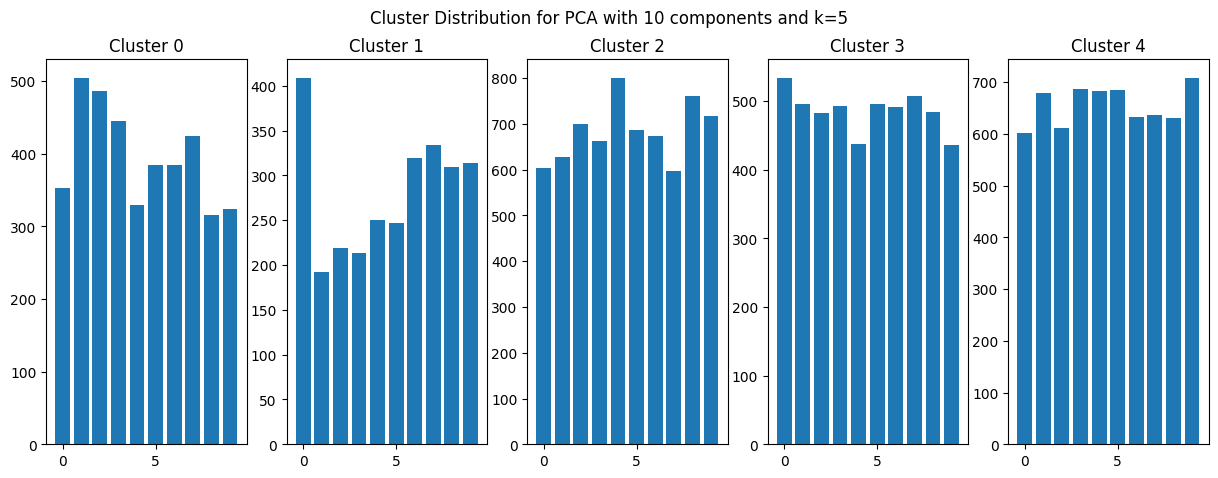

In [46]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for i in range(5):
    axes[i].bar(np.arange(10), np.bincount(y_train[cl_assig_k5_10 == i]))
    axes[i].set_title("Cluster " + str(i))

fig.suptitle("Cluster Distribution for PCA with 10 components and k=5")
fig.show()

Below are the top 3 labels in each cluster.

In [47]:
print("For PCA with", comp, "components and k=5")
for i in range(5):
    print("Cluster: ", i, "Label: ", np.argpartition(np.bincount(y_train[cl_assig_k5_comp == i]), -3)[-3:])

For PCA with 25 components and k=5
Cluster:  0 Label:  [7 9 0]
Cluster:  1 Label:  [3 2 1]
Cluster:  2 Label:  [7 1 0]
Cluster:  3 Label:  [4 8 5]
Cluster:  4 Label:  [9 3 5]


In [48]:
print("For PCA with 10 components and k=5")
for i in range(5):
    print("Cluster: ", i, "Label: ", np.argpartition(np.bincount(y_train[cl_assig_k5_10 == i]), -3)[-3:])

For PCA with 10 components and k=5
Cluster:  0 Label:  [3 2 1]
Cluster:  1 Label:  [6 7 0]
Cluster:  2 Label:  [9 8 4]
Cluster:  3 Label:  [1 7 0]
Cluster:  4 Label:  [5 3 9]
